In [45]:
!pip3 install particle
import uproot
import numpy as np
import particle
import awkward as ak
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


In [46]:
# Open the G4SBS root file and navigate to the tree containing the event data
file = uproot.open("~/CDetOptical/macros/gep_12Gev1000.root")
tree = file["T"]

In [47]:
# Get the arrays for the variables of interest
cdet_hit = tree["Earm.CDET_Scint.hit.nhits"].array()
track_indexes = tree["Earm.CDET_Scint.hit.sdtridx"].array()
pid = tree["SDTrack.PID"].array()
xpos = tree["SDTrack.posx"].array()
ypos = tree["SDTrack.posy"].array()
zpos = tree["SDTrack.posz"].array()
xmomentum = tree["SDTrack.momx"].array()
ymomentum = tree["SDTrack.momy"].array()
zmomentum = tree["SDTrack.momz"].array()
energy = tree["SDTrack.Etot"].array()

dat_for_tree = {"X_vtx": [], "Y_vtx": [], "Z_vtx": [], "Px_p": [], "Py_p": [], "Pz_p": [], "En_p": [], "Mass": [], "PDG": []}

In [48]:
for event in range(len(cdet_hit)):

    for hit in range(cdet_hit[event]):

        track_idx = track_indexes[event][hit]

        dat_for_tree["X_vtx"].append(xpos[event][track_idx])
        dat_for_tree["Y_vtx"].append(ypos[event][track_idx])
        dat_for_tree["Z_vtx"].append(zpos[event][track_idx])
        dat_for_tree["Px_p"].append(xmomentum[event][track_idx])
        dat_for_tree["Py_p"].append(ymomentum[event][track_idx])
        dat_for_tree["Pz_p"].append(zmomentum[event][track_idx])
        dat_for_tree["En_p"].append(energy[event][track_idx])
        dat_for_tree["Mass"].append(particle.Particle.from_pdgid(pid[event][track_idx]).mass)
        dat_for_tree["PDG"].append(pid[event][track_idx])



##########OLD POSITIONS##########

1.7522270889273968
-0.04333599468357936
3.432771667646913


##########OLD Momenta##########

1.671164259746207
0.0006137336146402259
3.308711882803213


Text(0.5, 1.0, 'Pz_p')

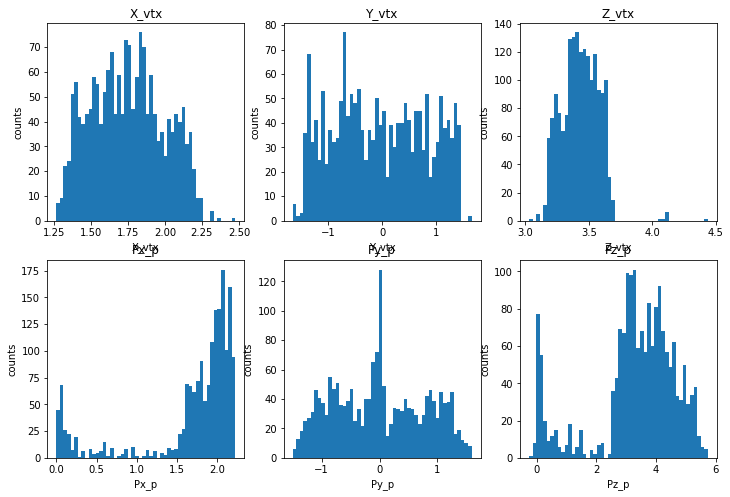

In [49]:
plt.rcParams["figure.figsize"] = (12,8)

figure, axis = plt.subplots(2,3)

plot1 = plt.subplot2grid((2,3),(0,0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((2,3),(0,1), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((2,3),(0,2), rowspan=1, colspan=1)
plot4 = plt.subplot2grid((2,3),(1,0), rowspan=1, colspan=1)
plot5 = plt.subplot2grid((2,3),(1,1), rowspan=1, colspan=1)
plot6 = plt.subplot2grid((2,3),(1,2), rowspan=1, colspan=1)

print("\n\n##########OLD POSITIONS##########\n")

plot1.hist(dat_for_tree["X_vtx"], bins=50)
print(np.mean(dat_for_tree["X_vtx"]))
plot1.set_xlabel('X_vtx')
plot1.set_ylabel('counts')
plot1.set_title('X_vtx')


plot2.hist(dat_for_tree["Y_vtx"], bins=50)
print(np.mean(dat_for_tree["Y_vtx"]))
plot2.set_xlabel('Y_vtx')
plot2.set_ylabel('counts')
plot2.set_title('Y_vtx')


plot3.hist(dat_for_tree["Z_vtx"], bins=50)
print(np.mean(dat_for_tree["Z_vtx"]))
plot3.set_xlabel('Z_vtx')
plot3.set_ylabel('counts')
plot3.set_title('Z_vtx')

print("\n\n##########OLD Momenta##########\n")

plot4.hist(dat_for_tree["Px_p"], bins=50)
print(np.mean(dat_for_tree["Px_p"]))
plot4.set_xlabel('Px_p')
plot4.set_ylabel('counts')
plot4.set_title('Px_p')


plot5.hist(dat_for_tree["Py_p"], bins=50)
print(np.mean(dat_for_tree["Py_p"]))
plot5.set_xlabel('Py_p')
plot5.set_ylabel('counts')
plot5.set_title('Py_p')


plot6.hist(dat_for_tree["Pz_p"], bins=50)
print(np.mean(dat_for_tree["Pz_p"]))
plot6.set_xlabel('Pz_p')
plot6.set_ylabel('counts')
plot6.set_title('Pz_p')

angle: 0.5061454830783556


##########NEW POSITIONS BB Coordinate System ##########

-13.17083852248892
-4.333599468357935
385.1866300201993


##########New Momenta BB Coordinate Systeam##########

-0.14246215596531575
0.0006137336146402259
3.7040611280827944


Text(0, 0.5, 'counts')

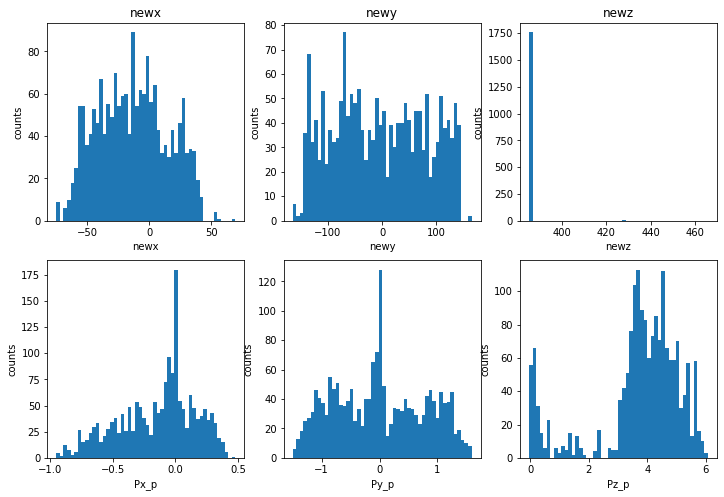

In [50]:
tx = np.array(dat_for_tree["Z_vtx"])
ty = np.array(dat_for_tree["X_vtx"])
angle = np.radians(29.0)
bbdist = 4.50

print("angle:", angle)

newx = (-tx * np.sin(angle) + ty * np.cos(angle)) * 100
newz = ((tx * np.cos(angle) + ty * np.sin(angle))) * 100
newy = np.array(dat_for_tree["Y_vtx"]) * 100

txp = np.array(dat_for_tree["Pz_p"])
typ = np.array(dat_for_tree["Px_p"])

newxp = (-txp * np.sin(angle) + typ * np.cos(angle))
newzp = (txp * np.cos(angle) + typ * np.sin(angle))
newyp = np.array(dat_for_tree["Py_p"])

plt.rcParams["figure.figsize"] = (12,8)

figure, axis = plt.subplots(2,3)

plot1 = plt.subplot2grid((2,3),(0,0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((2,3),(0,1), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((2,3),(0,2), rowspan=1, colspan=1)
plot4 = plt.subplot2grid((2,3),(1,0), rowspan=1, colspan=1)
plot5 = plt.subplot2grid((2,3),(1,1), rowspan=1, colspan=1)
plot6 = plt.subplot2grid((2,3),(1,2), rowspan=1, colspan=1)

print("\n\n##########NEW POSITIONS BB Coordinate System ##########\n")

plot1.hist(newx, bins=50)
print(np.mean(newx))
plot1.set_xlabel('newx')
plot1.set_ylabel('counts')
plot1.set_title('newx')


plot2.hist(newy, bins=50)
print(np.mean(newy))
plot2.set_xlabel('newy')
plot2.set_ylabel('counts')
plot2.set_title('newy')


plot3.hist(newz, bins=50)
print(np.mean(newz))
plot3.set_xlabel('newz')
plot3.set_ylabel('counts')
plot3.set_title('newz')

print("\n\n##########New Momenta BB Coordinate Systeam##########\n")

plot4.hist(newxp, bins=50)
print(np.mean(newxp))
plot4.set_xlabel('Px_p')
plot4.set_ylabel('counts')


plot5.hist(newyp, bins=50)
print(np.mean(newyp))
plot5.set_xlabel('Py_p')
plot5.set_ylabel('counts')


plot6.hist(newzp, bins=50)
print(np.mean(newzp))
plot6.set_xlabel('Pz_p')
plot6.set_ylabel('counts')

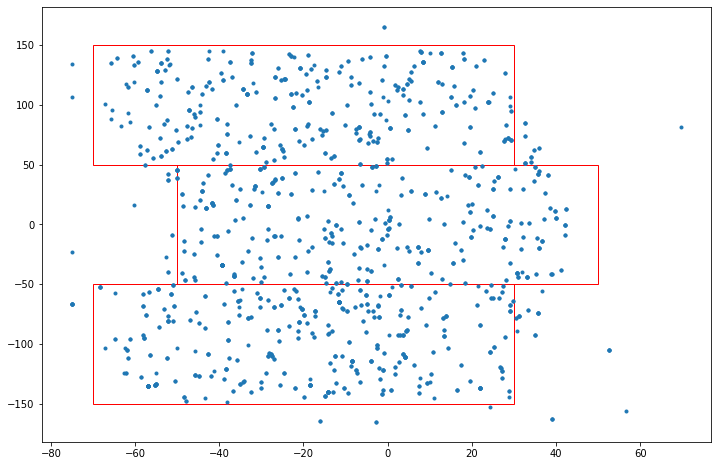

In [51]:

fig, ax = plt.subplots()

ax.plot(newx,newy,'.')

import matplotlib.patches as patches
rect = patches.Rectangle((-50, -50), 100, 100, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

import matplotlib.patches as patches
rect = patches.Rectangle((-70, -150), 100, 100, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

import matplotlib.patches as patches
rect = patches.Rectangle((-70, 50), 100, 100, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

In [68]:
# Toy Model

import random

xsize = 100.0 #size of CDet module horizontally
ysize = 100.0 #sizw of CDet module vertically
mp = 938.2796 #mass of proton in MeV
ebeam = 11000 #beam energy in MeV

nevents = 1000
x_vtx = np.zeros(nevents)
y_vtx = np.zeros(nevents)
z_vtx = np.zeros(nevents)
theta_polar = np.zeros(nevents)
px = np.zeros(nevents)
py = np.zeros(nevents)
pz = np.zeros(nevents)
e = np.zeros(nevents)
mass = 0.000511

for ievent in range(nevents):
    
    # Step 0:  Choose vertex position somewhere on the face of CDet
    #          Use the red rectangles above as a starting point
    module = int(np.floor(3.0*random.random())+1)

    z_vtx[ievent] = bbdist*100.0
    if (module == 1):
        x_vtx[ievent] = -xsize/2.0+xsize*random.random()-20.0
        y_vtx[ievent] = -ysize/2.0+ysize*random.random()-ysize
    
    if (module == 2):
        x_vtx[ievent] = -xsize/2.0+xsize*random.random()
        y_vtx[ievent] = -ysize/2.0+ysize*random.random()
    
    if (module == 3):
        x_vtx[ievent] = -xsize/2.0+xsize*random.random()-20.0
        y_vtx[ievent] = -ysize/2.0+ysize*random.random()+ysize
    
    # Step 1:  Calculate polar scattering angle ... assume center of target
    
    theta_polar[ievent] = np.arccos((-x_vtx[ievent]*np.sin(angle)+z_vtx[ievent]*np.cos(angle))/np.sqrt(x_vtx[ievent]**2+y_vtx[ievent]**2+z_vtx[ievent]**2))
    e[ievent] = ebeam*mp/(mp+ebeam*(1.0-np.cos(theta_polar[ievent])))
    
    #if (np.fabs(x_vtx[ievent])<500.0 and np.fabs(y_vtx[ievent])<500.0):
    #    print (x_vtx[ievent],y_vtx[ievent],z_vtx[ievent])
    #    print(theta_polar[ievent]*180.0/np.pi, e[ievent])
    
    px[ievent] = e[ievent]*(x_vtx[ievent]/np.sqrt(x_vtx[ievent]**2+y_vtx[ievent]**2+z_vtx[ievent]**2))
    py[ievent] = e[ievent]*(y_vtx[ievent]/np.sqrt(x_vtx[ievent]**2+y_vtx[ievent]**2+z_vtx[ievent]**2))
    pz[ievent] = e[ievent]*(z_vtx[ievent]/np.sqrt(x_vtx[ievent]**2+y_vtx[ievent]**2+z_vtx[ievent]**2))

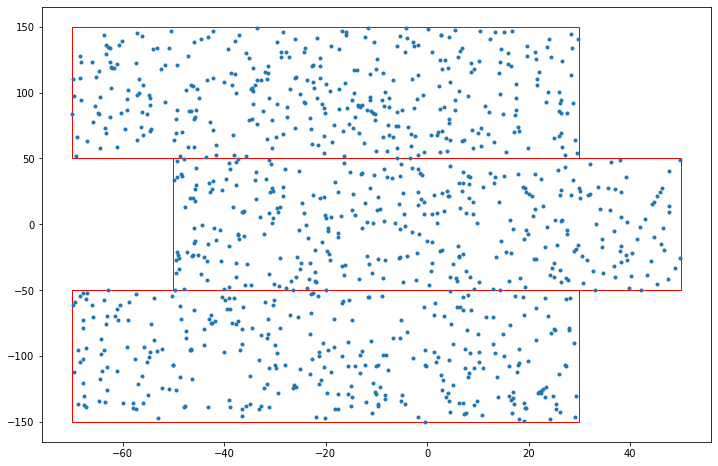

In [69]:
fig, ax = plt.subplots()

ax.plot(x_vtx,y_vtx,'.')

import matplotlib.patches as patches
rect = patches.Rectangle((-50, -50), 100, 100, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

import matplotlib.patches as patches
rect = patches.Rectangle((-70, -150), 100, 100, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

import matplotlib.patches as patches
rect = patches.Rectangle((-70, 50), 100, 100, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)



##########NEW POSITIONS BB Coordinate System ##########

-13.995148047939681
3.2034075644621263
450.0


##########New Momenta BB Coordinate Systeam##########

-174.1755174524586
33.27477284109012
4401.24385484996


Text(0, 0.5, 'counts')

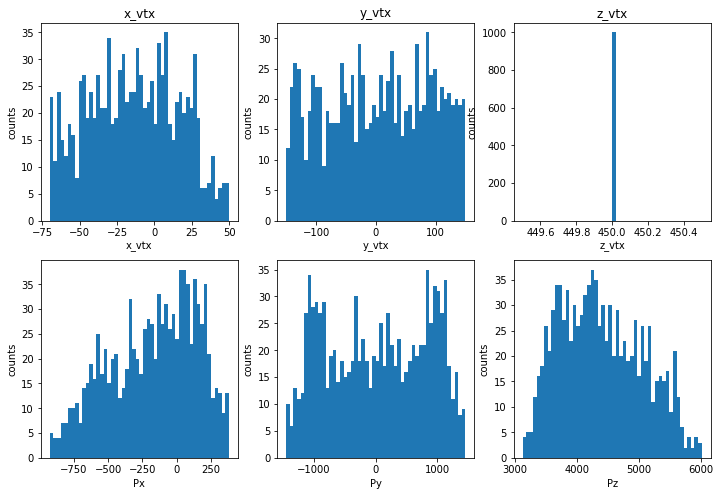

In [70]:
plt.rcParams["figure.figsize"] = (12,8)

figure, axis = plt.subplots(2,3)

plot1 = plt.subplot2grid((2,3),(0,0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((2,3),(0,1), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((2,3),(0,2), rowspan=1, colspan=1)
plot4 = plt.subplot2grid((2,3),(1,0), rowspan=1, colspan=1)
plot5 = plt.subplot2grid((2,3),(1,1), rowspan=1, colspan=1)
plot6 = plt.subplot2grid((2,3),(1,2), rowspan=1, colspan=1)

print("\n\n##########NEW POSITIONS BB Coordinate System ##########\n")

plot1.hist(x_vtx, bins=50)
print(np.mean(x_vtx))
plot1.set_xlabel('x_vtx')
plot1.set_ylabel('counts')
plot1.set_title('x_vtx')


plot2.hist(y_vtx, bins=50)
print(np.mean(y_vtx))
plot2.set_xlabel('y_vtx')
plot2.set_ylabel('counts')
plot2.set_title('y_vtx')


plot3.hist(z_vtx, bins=50)
print(np.mean(z_vtx))
plot3.set_xlabel('z_vtx')
plot3.set_ylabel('counts')
plot3.set_title('z_vtx')

print("\n\n##########New Momenta BB Coordinate Systeam##########\n")

plot4.hist(px, bins=50)
print(np.mean(px))
plot4.set_xlabel('Px')
plot4.set_ylabel('counts')


plot5.hist(py, bins=50)
print(np.mean(py))
plot5.set_xlabel('Py')
plot5.set_ylabel('counts')


plot6.hist(pz, bins=50)
print(np.mean(pz))
plot6.set_xlabel('Pz')
plot6.set_ylabel('counts')

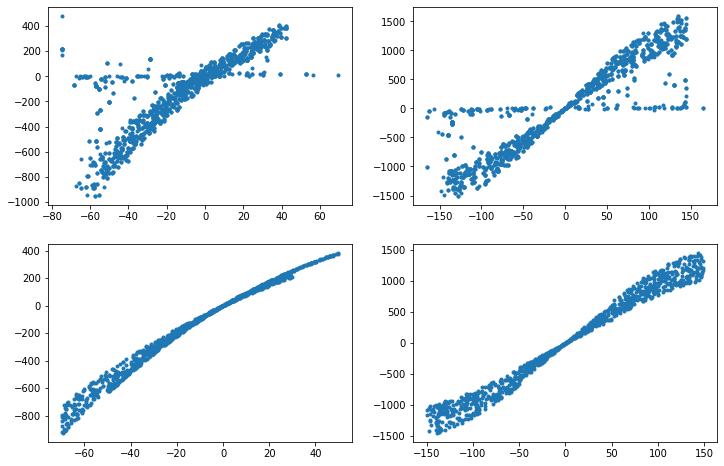

In [75]:
figure, axis = plt.subplots(2,2)

plot1 = plt.subplot2grid((2,2),(0,0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((2,2),(0,1), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((2,2),(1,0), rowspan=1, colspan=1)
plot4 = plt.subplot2grid((2,2),(1,1), rowspan=1, colspan=1)

plot1.plot(newx,newxp*1000,'.')
plot2.plot(newy,newyp*1000,'.')
plot3.plot(x_vtx,px,'.')
plot4.plot(y_vtx,py,'.')